Customer Segmentation

Customer segmentation is the pratice of dividing a company's customers into groups that reflects similarites among customers in each group.The goal of segmenting customers  is to decide how to relate to each segment in order to maximise the value of each customer to the business.The process requires a cut out strategy to understand how to manage and group customers and which data to use in the process

Clustering is an essential technique in machine learning and is used widely across domains and industries (think about Uber’s route optimization, Amazon’s recommendation system, Netflix’s customer segmentation etc)

Types of Segmentation

1.Demographic ; Age,gender, Income, location education and ethnicity

2.Pschographic : Interest, Lifestyle, Psychological, influences, motivation and priorities

3.Behaviourial: Purchasing Habits, Spending Habits, User status, brand interactions

4.Geographic: Zip Code, City, Country, Climate, Urban or Rural

Advantages of Customer Segmenation

Some advantages of customer segementation include the following;

1.Price Optimization 

2.Enhance Competitiveness

3.Brand Awareness

4.Acquisition & Retention

5.Increases Revenue & ROI

6.Client Satisfaction

Information on Columns
Month

Credit amount

Credit term

Age

Sex

Education

Product type

Having Children

Region

Income

Family Status

Phone Operator

is_clent

bad_client



In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
import sklearn.cluster
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('dataset.csv',on_bad_lines= "skip", sep='delimiter', header=None)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1145689565.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('dataset.csv',on_bad_lines= "skip", sep='delimiter', header=None)


In [3]:
#viewing the first lines of the code
data.head(40)

,0
0,% Context
1,% Imbalanced classes put accuracy out of busin...
2,% Content
3,% Standard accuracy no longer reliably measure...
4,"% Imbalanced classes appear in many domains, i..."
5,%
6,% Antifraud
7,% Antispam
8,%
9,%


In [4]:
#checking shape of the unstructured data
data.shape

(1758, 1)

In [5]:
#dropping the first 35 lines of the unstructed data 
data =data.drop(range(0,35),axis= 0)
data.head()

,0
35,"1,7000,12,39,male,'Secondary special education..."
36,"1,19000,6,20,male,'Secondary special education..."
37,"1,29000,12,23,female,'Secondary special educat..."
38,"1,10000,12,30,male,'Secondary special educatio..."
39,"1,14500,12,25,female,'Higher education','Cell ..."


In [6]:
# Split the data into their respective columns
data= data[0].str.split(",", expand = True)
data.reset_index(drop = True, inplace = True)

In [7]:
#View first 5 of the data afetr splitting
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,7000,12,39,male,'Secondary special education','Cell phones',0,2,21000,Another,0,0,0
1,1,19000,6,20,male,'Secondary special education','Household appliances',1,2,17000,Another,3,1,0
2,1,29000,12,23,female,'Secondary special education','Household appliances',0,2,31000,Another,2,0,0
3,1,10000,12,30,male,'Secondary special education','Cell phones',1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,'Higher education','Cell phones',0,2,26000,Married,0,1,0


In [8]:
#adding column titles
data.columns = ['month','credit_amount','credit_term','age','sex','education',
                 'product_type','having children','region','income','family_status',
                 'phone_operator','is_client','bad client']

In [9]:
#previewing the 1st five of the dataset after spliting columns
data.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having children,region,income,family_status,phone_operator,is_client,bad client
0,1,7000,12,39,male,'Secondary special education','Cell phones',0,2,21000,Another,0,0,0
1,1,19000,6,20,male,'Secondary special education','Household appliances',1,2,17000,Another,3,1,0
2,1,29000,12,23,female,'Secondary special education','Household appliances',0,2,31000,Another,2,0,0
3,1,10000,12,30,male,'Secondary special education','Cell phones',1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,'Higher education','Cell phones',0,2,26000,Married,0,1,0


In [11]:
# unique features of the education
data['education'].unique()

array(["'Secondary special education'", "'Higher education'",
       "'Incomplete higher education'", "'Secondary education'",
       "'Incomplete secondary education'", "'PhD degree'"], dtype=object)

In [12]:
# bad client unique features
data['bad client'].unique()

array(['0', '1'], dtype=object)

In [13]:
#unique features of the family status
data['family_status'].unique()

array(['Another', 'Unmarried', 'Married'], dtype=object)

In [14]:
# unique features of the product type column
data['product_type'].unique()

array(["'Cell phones'", "'Household appliances'", 'Furniture',
       'Computers', "'Cosmetics and beauty services'", 'Clothing',
       "'Windows  Doors'", 'Fitness', 'Tourism', "'Medical services'",
       "'Audio  Video'", 'Jewelry', "'Construction Materials'", 'Boats',
       'Auto', "'Garden equipment'", 'Training', "'Childen\\'s goods'",
       'Music', "'Sporting goods'", "'Repair Services'",
       "'Fishing and hunting supplies'"], dtype=object)

In [15]:
#credit terms avaliable in months
data['credit_term'].unique()

array(['12', '6', '24', '3', '10', '18', '11', '36', '9', '8', '4', '15',
       '14', '5', '16', '17', '20', '7', '13', '30', '27', '34'],
      dtype=object)

In [16]:
#phone operator features
data['phone_operator'].unique()

array(['0', '3', '2', '1', '4'], dtype=object)

In [17]:
# unique sex values in the sex columns
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
#features in the region column
data['region'].unique()

array(['2', '0', '1'], dtype=object)

In [19]:
#is client unique features
data['is_client'].unique()

array(['0', '1'], dtype=object)

In [20]:
#unique of customers having children
data['having children'].unique()

array(['0', '1'], dtype=object)

In [21]:
#unique months in the data
data['month'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype=object)

In [22]:
#Checking missing values in the data sets
data.isnull().sum()

month              0
credit_amount      0
credit_term        0
age                0
sex                0
education          0
product_type       0
having children    0
region             0
income             0
family_status      0
phone_operator     0
is_client          0
bad client         0
dtype: int64

In [23]:
#checking for the data types of the columns
data.dtypes

month              object
credit_amount      object
credit_term        object
age                object
sex                object
education          object
product_type       object
having children    object
region             object
income             object
family_status      object
phone_operator     object
is_client          object
bad client         object
dtype: object

In [24]:
cols = ['month', 'credit_amount', 'credit_term', 'age','region', 'income', 
       'phone_operator', 'is_client', 'bad client']

In [25]:

#converting some columns in dataset to numerics
for column in cols:
    data[column] = pd.to_numeric(data[column])
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month            1723 non-null   int64 
 1   credit_amount    1723 non-null   object
 2   credit_term      1723 non-null   object
 3   age              1723 non-null   object
 4   sex              1723 non-null   object
 5   education        1723 non-null   object
 6   product_type     1723 non-null   object
 7   having children  1723 non-null   object
 8   region           1723 non-null   object
 9   income           1723 non-null   object
 10  family_status    1723 non-null   object
 11  phone_operator   1723 non-null   object
 12  is_client        1723 non-null   object
 13  bad client       1723 non-null   object
dtypes: int64(1), object(13)
memory usage: 188.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column  

In [26]:
# checking statistics of the numerical columns
data.describe()

,month,credit_amount,credit_term,age,region,income,phone_operator,is_client,bad client
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,1.681370,32652.350551,1.125363,0.604759,0.113755
std,3.538420,27926.778301,6.548354,13.120203,0.704256,20913.193158,1.015822,0.489044,0.317606
min,1.000000,5000.000000,3.000000,18.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,3.000000,13000.000000,6.000000,26.000000,2.000000,21000.000000,0.000000,0.000000,0.000000
50%,7.000000,21500.000000,12.000000,32.000000,2.000000,27000.000000,1.000000,1.000000,0.000000
75%,10.000000,34000.000000,12.000000,44.000000,2.000000,38000.000000,2.000000,1.000000,0.000000
max,12.000000,301000.000000,36.000000,90.000000,2.000000,401000.000000,4.000000,1.000000,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\582489184.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data.corr()


<Axes: >

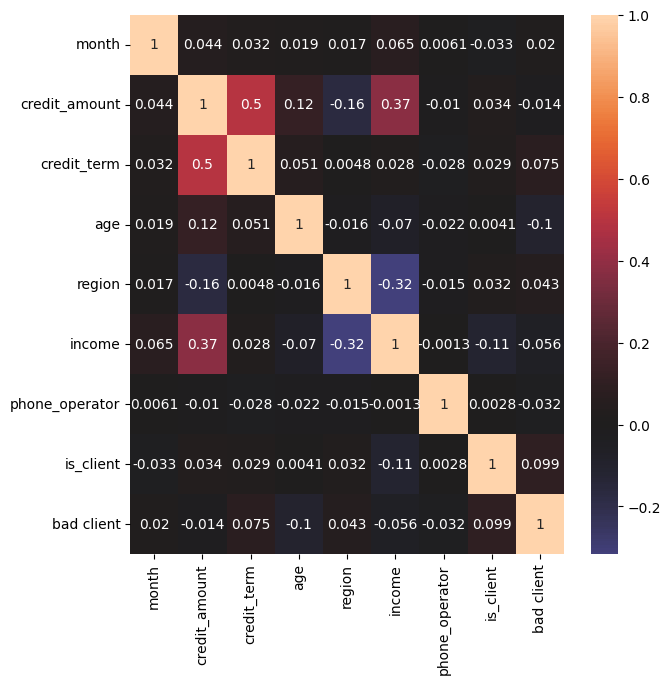

In [27]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(7,7))  
sns.heatmap(corrmat,annot=True,  center=0)

<Figure size 2000x2000 with 0 Axes>

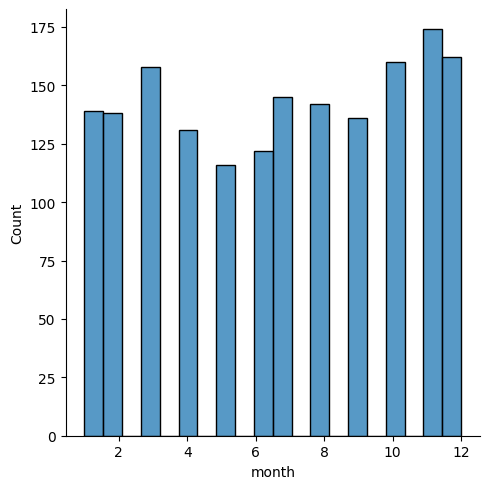

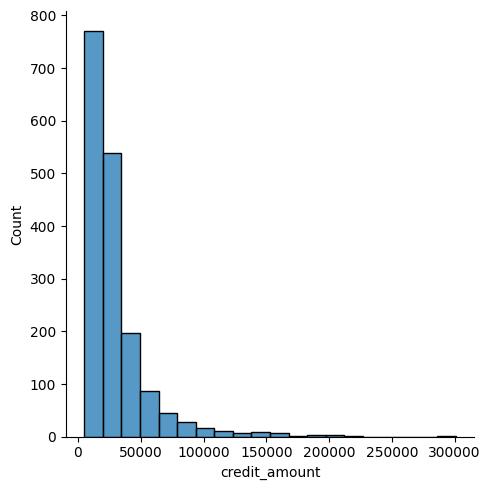

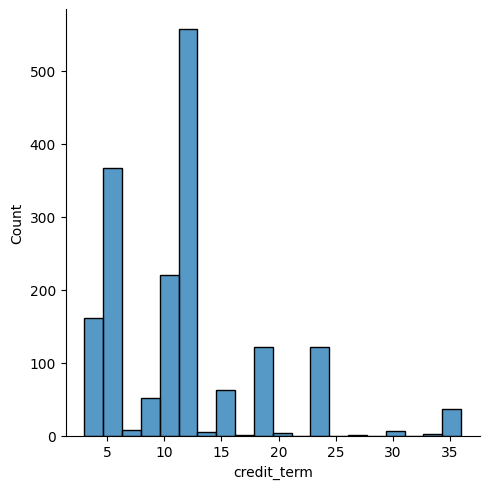

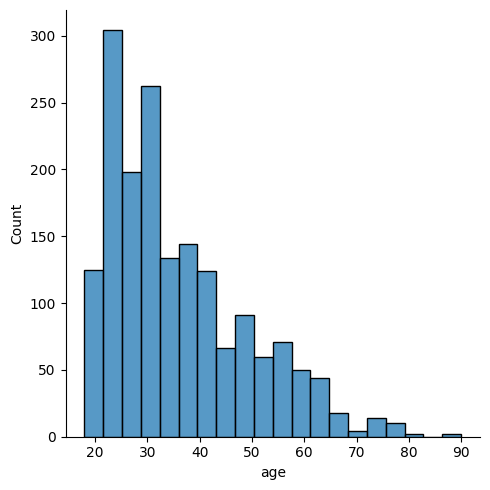

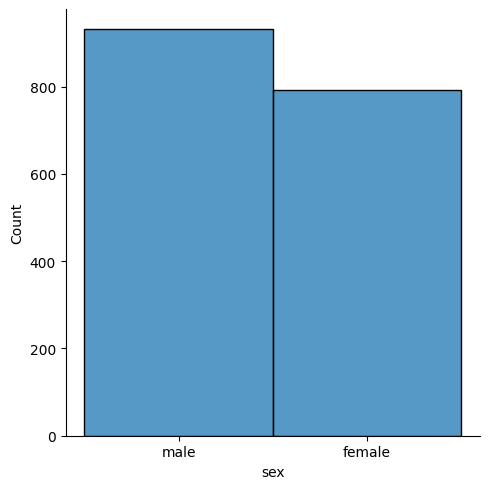

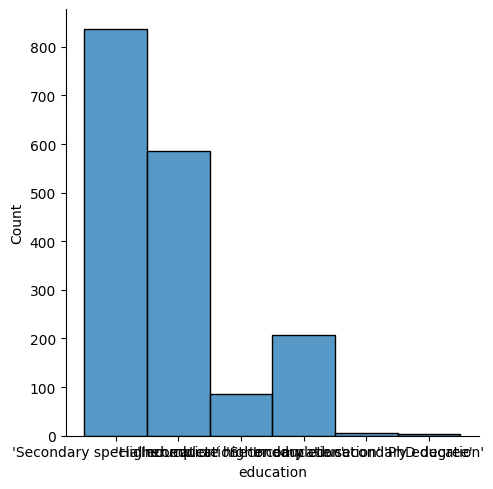

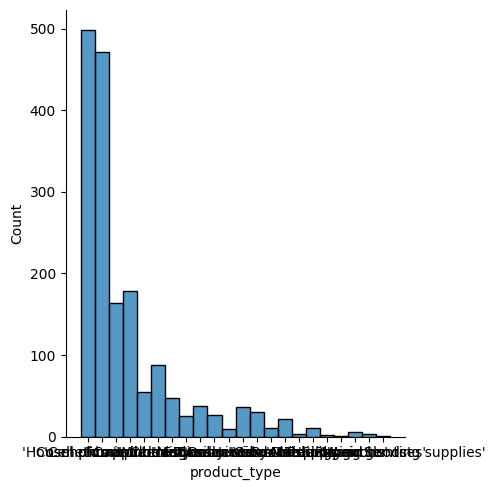

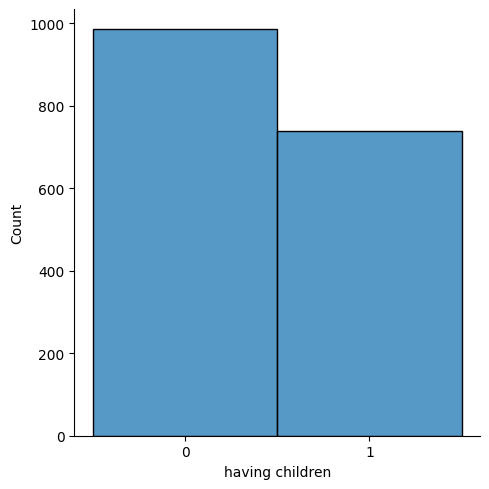

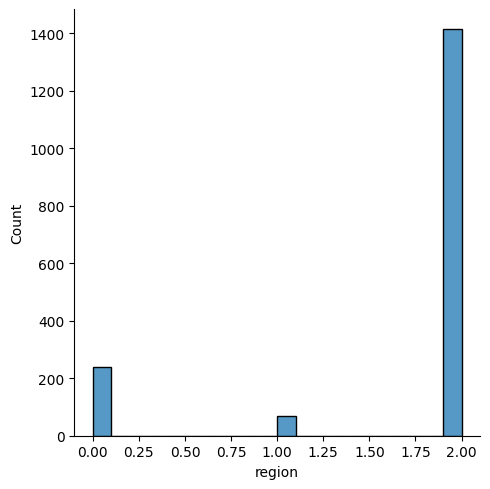

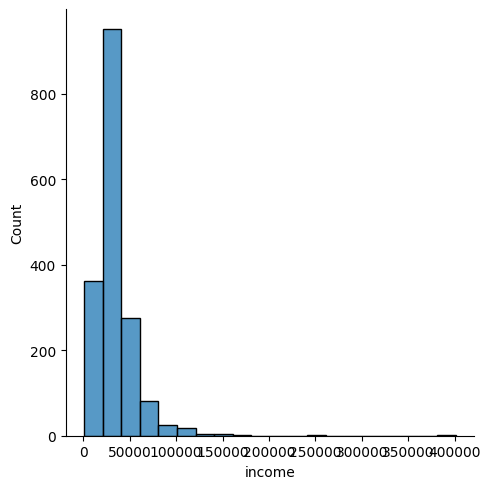

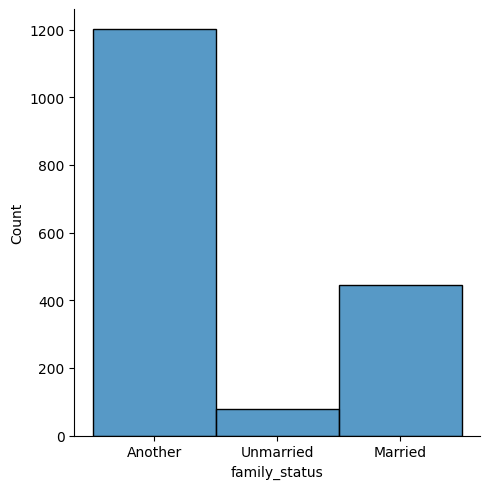

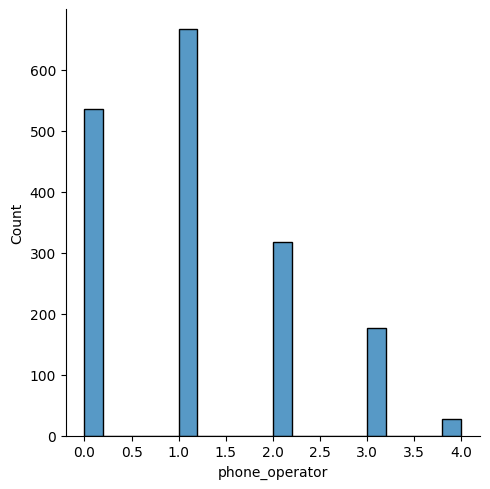

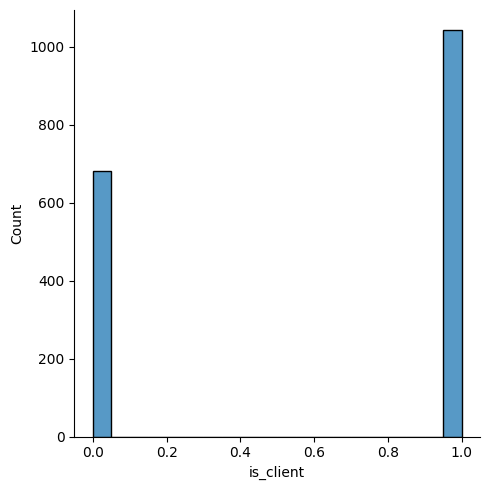

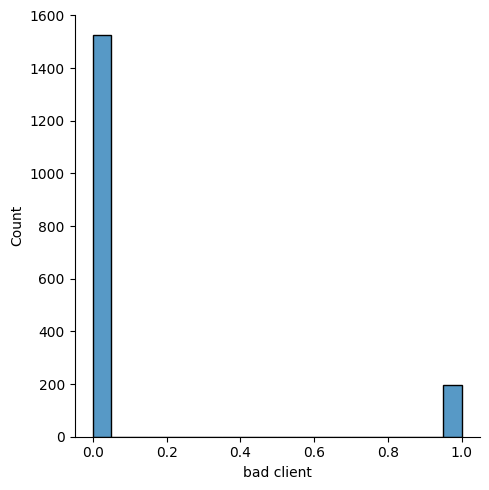

In [28]:
plt.figure(figsize=(20,20)) 
for cols in data.columns:
    sns.displot(data[cols], bins = 20)
    plt.show()
    

Customer Segmentation based on age, income and credit term

Segmenting based on Age

<function matplotlib.pyplot.show(close=None, block=None)>

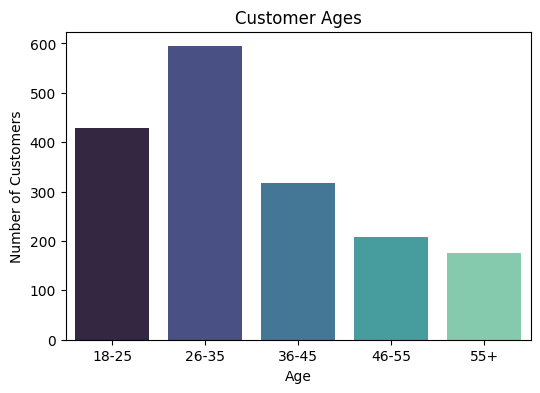

In [29]:
age_18_25 = data.age[(data.age >= 18) & (data.age <= 25)]
age_26_35 = data.age[(data.age >= 26) & (data.age <= 35)]
age_36_45 = data.age[(data.age >= 36) & (data.age <= 45)]
age_46_55 = data.age[(data.age >= 46) & (data.age <= 55)]
age_55above = data.age[(data.age >= 56)]
agex = ['18-25', '26-35','36-45','46-55','55+']
agey =[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(6,4))
sns.barplot(x=agex,y =agey,hue=agex,palette ='mako')
plt.title('Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show


MAjority of customers fall within 26 - 35 years

Segmentation based on Income

<function matplotlib.pyplot.show(close=None, block=None)>

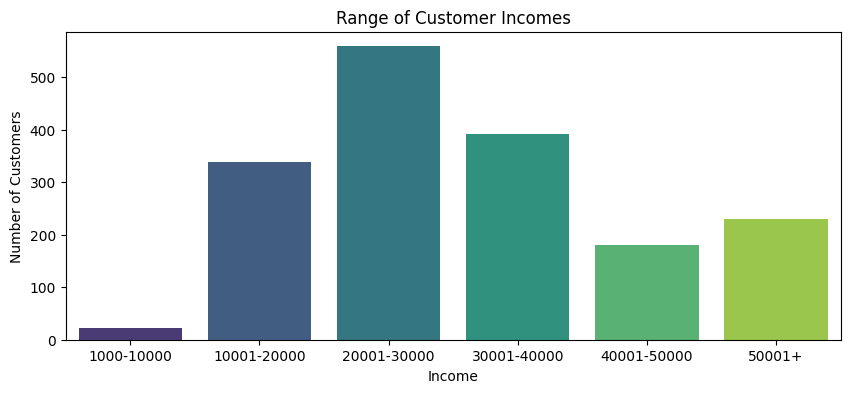

In [30]:
income_1000_10000 = data.income[(data.income >= 1000) & (data.income <= 10000)]
income_10000_20000 = data.income[(data.income >= 10001) & (data.income <= 20000)]
income_20000_30000 = data.income[(data.income >= 20001) & (data.income <= 30000)]
income_30000_40000= data.income[(data.income >= 30001) & (data.income <= 40000)]
income_40000_50000= data.income[(data.income >= 40001) & (data.income <= 50000)]
income_50000above = data.income[(data.income >= 50001)]
incomex = ['1000-10000', '10001-20000','20001-30000','30001-40000','40001-50000','50001+']
incomey =[len(income_1000_10000.values),len(income_10000_20000.values),len(income_20000_30000.values),len(income_30000_40000.values),
       len(income_40000_50000.values),len(income_50000above.values)]
plt.figure(figsize=(10,4))
sns.barplot(x=incomex,y =incomey,hue=incomex, palette ='viridis')
plt.title('Range of Customer Incomes')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show


Majority of customers income range fall between 20,000 to 30,000 USD

Segmentaion based on credit term

In [31]:
data['credit_term'].unique()

array([12,  6, 24,  3, 10, 18, 11, 36,  9,  8,  4, 15, 14,  5, 16, 17, 20,
        7, 13, 30, 27, 34], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

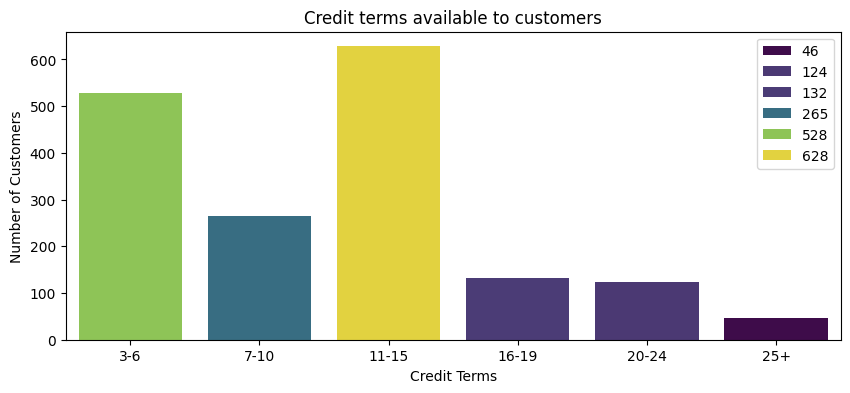

In [32]:
credit_term_3_6 = data.credit_term[(data.credit_term >= 3) & (data.credit_term <= 6)]
credit_term_7_10 = data.credit_term[(data.credit_term >= 7 ) &(data.credit_term <= 10)]
credit_term_11_15 = data.credit_term[(data.credit_term >= 11) & (data.credit_term <= 15)]
credit_term_16_19= data.credit_term[(data.credit_term >= 16) & (data.credit_term <= 19)]
credit_term_20_24= data.credit_term[(data.credit_term >= 20) & (data.credit_term <= 24)]
credit_term_25above = data.credit_term[(data.credit_term >= 25)]
credit_termx = ['3-6', '7-10','11-15','16-19','20-24','25+']
credit_termy =[len(credit_term_3_6.values),len(credit_term_7_10.values),len(credit_term_11_15.values),len(credit_term_16_19.values),
       len(credit_term_20_24.values),len(credit_term_25above.values)]
plt.figure(figsize=(10,4))
sns.barplot(x=credit_termx,y =credit_termy,hue=credit_termy, palette ='viridis')
plt.title('Credit terms available to customers')
plt.xlabel('Credit Terms')
plt.ylabel('Number of Customers')
plt.show

From the visualisation above majority of the customers access the credit terms from 11 to 15 months and 3-6 months

Feature Engineeing

Encoding Cartegorical Columns using the one-hot encoder and the label enconder

In [33]:
data.dtypes

month               int64
credit_amount       int64
credit_term         int64
age                 int64
sex                object
education          object
product_type       object
having children    object
region              int64
income              int64
family_status      object
phone_operator      int64
is_client           int64
bad client          int64
dtype: object

In [38]:
# Visualizing the distribution of the columns with categorical values and their churn levels
cart_cols = [column for column in data.columns if (data[column].dtype == "O")]

for column in data[cart_cols].columns:
    # Visualizing the distribution of the categories in the column
    fig = px.histogram(data, x=data[column], text_auto=True,
                       title=f"Distribution of values in the {column} column")
    fig.show()

    # Visualizing the churn proportions of the categories in the column
    fig = px.histogram(data, x=data[column], color="bad_client", barnorm="percent", text_auto=".2f",
                       title=f"Churn proportions of users in {column} column")
    fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [36]:
#identitfying the cartegorical columns to encode
#cart_cols = ('sex','education','product_type','having children','family_status')
#setting encoder
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
encoder.fit(data[cart_cols])
encoded_categoricals = encoder.transform(data[cart_cols])
encoded_categoricals = pd.DataFrame(encoded_categoricals, columns = encoder.get_feature_names_out().tolist())
encoded_categoricals

KeyError: ('sex', 'education', 'product_type', 'having children', 'family_status')

Customer Age ranges and their current Credit Amount

In [34]:
data.columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having children', 'region', 'income', 'family_status',
       'phone_operator', 'is_client', 'bad client'],
      dtype='object')

Clustering by K-Means Approach

The K-means clustering is an iterative algorithm that partition data into k clusters.

The K parameter is determined before the algorithm is formed. The K parameter represent the optimum number of clusters to put the data points into. 

Centriods: These are the centres of the clusters and these are also represented on the graphs representing the clusters.

The clusters when formed are usually color-coded based on their assigned clusters.Each cluster is represented with a different color.


Finding the optimum number of clusters for Credit Terms and Income

In [35]:
data.columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having children', 'region', 'income', 'family_status',
       'phone_operator', 'is_client', 'bad client'],
      dtype='object')

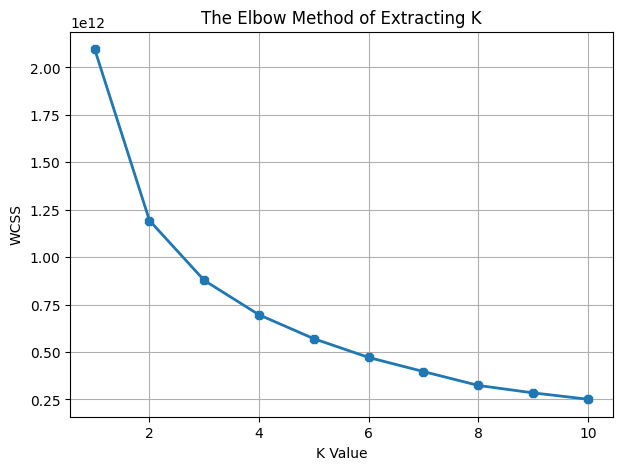

In [54]:
x1 = data.loc[:, ["credit_amount", "income"]].values
 
wcss = []
 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10,random_state=10)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(7, 5))
plt.grid()
plt.plot(range(1, 11), wcss , linewidth=2, marker="8")
plt.title("The Elbow Method of Extracting K")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

From the Visualisation above the optimum number of clusters for using the credit amount and the income is 4. Hence customers would be put in 4 different clusters using their income and their accessible credit terms

In [56]:
Clusters =KMeans(n_clusters=4, random_state = 10)
Cluster_label = Clusters.fit_predict(x1)
print(Cluster_label)

[2 2 2 ... 2 2 3]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
print(Clusters.cluster_centers_)

[[ 34180.27210884  74476.19047619]
 [ 60188.52459016  35315.57377049]
 [ 18746.12403101  26357.36434109]
 [155476.19047619  64142.85714286]]


Visualizing Income per Credit Amount Clusters

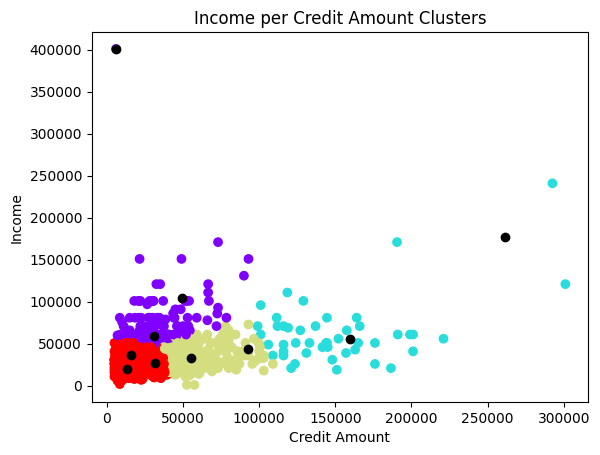

In [39]:
plt.scatter(x1[:,0], x1[:,1], c=Kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color ='black')
plt.title('Income per Credit Amount Clusters')
plt.ylabel('Income')
plt.xlabel('Credit Amount')
plt.show()

Validating the K number of clusters provided by this K-Means Approach using the Silhoutte Score

To evaluate the K- Means Clustering we use the Silhoutte Score which done by calculate the sum od squares within and between the clusters. The Silhoutte Score is between -1 and 1. Ideally distance between the clusters or sum squares between clusters are to be larger than sum of squares within clusters. Which in turn pulls the Silhoutte Score to the positive and when the sum of squres within clusters is biggers the the silhoutte score is would be drawn towards the positive. Hence a clustered data points with a silhouette score close to 1 indicates a well clustered data.

In [59]:
data.shape

(1723, 14)

In [62]:
data.columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having children', 'region', 'income', 'family_status',
       'phone_operator', 'is_client', 'bad client'],
      dtype='object')

Silhouette score using scikit-learn

For n_clusters = 2 The average silhouette_score is : 0.7004193494944913
For n_clusters = 3 The average silhouette_score is : 0.5341165361076655
For n_clusters = 4 The average silhouette_score is : 0.5227980128865142
For n_clusters = 5 The average silhouette_score is : 0.4097664233492561
For n_clusters = 6 The average silhouette_score is : 0.42697547735649244


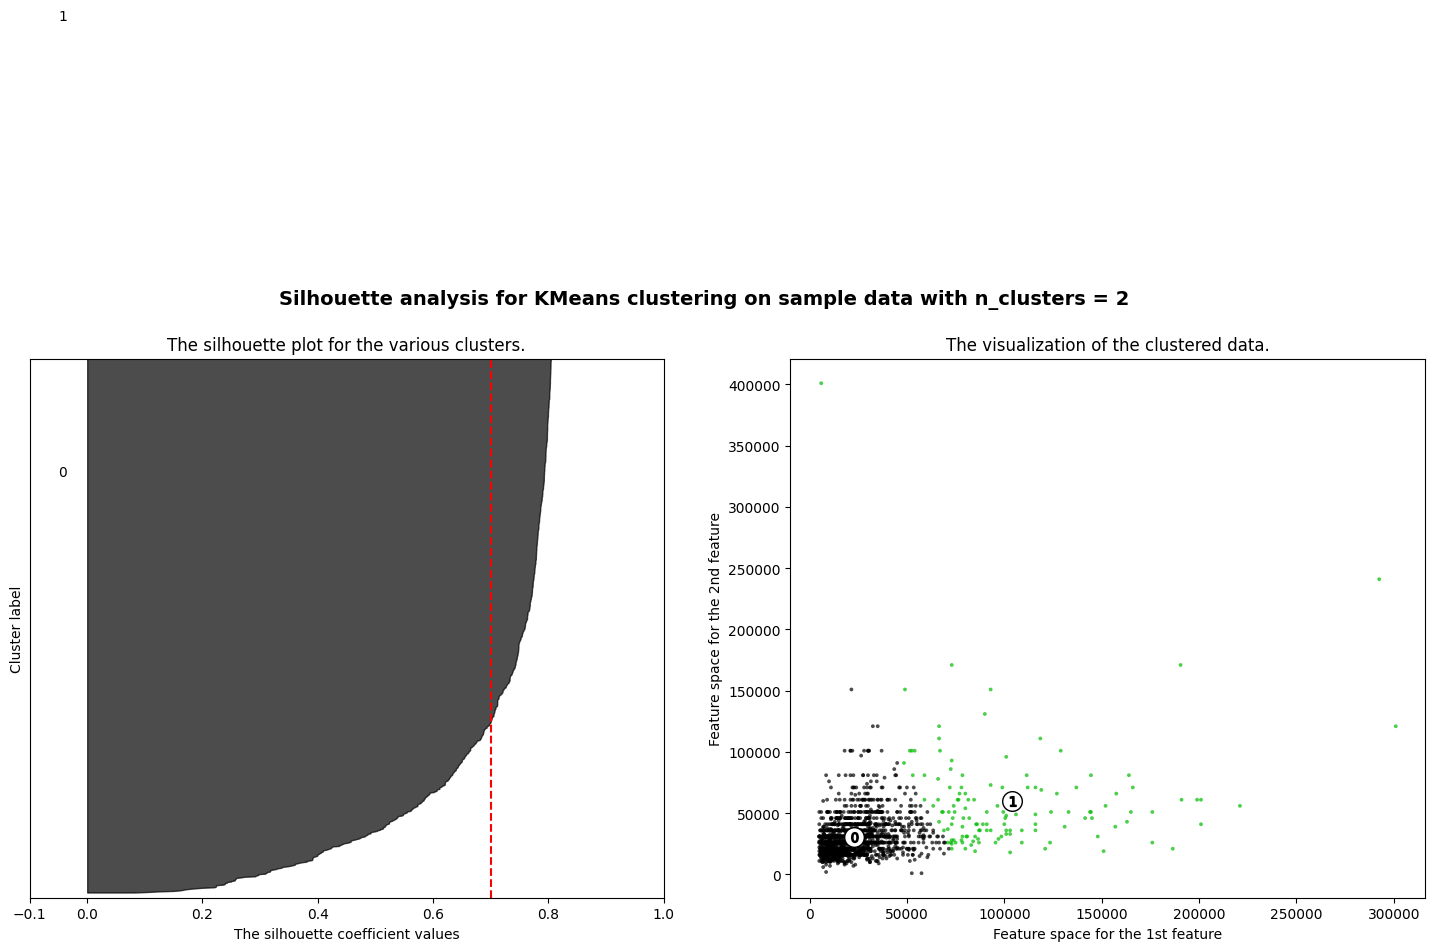

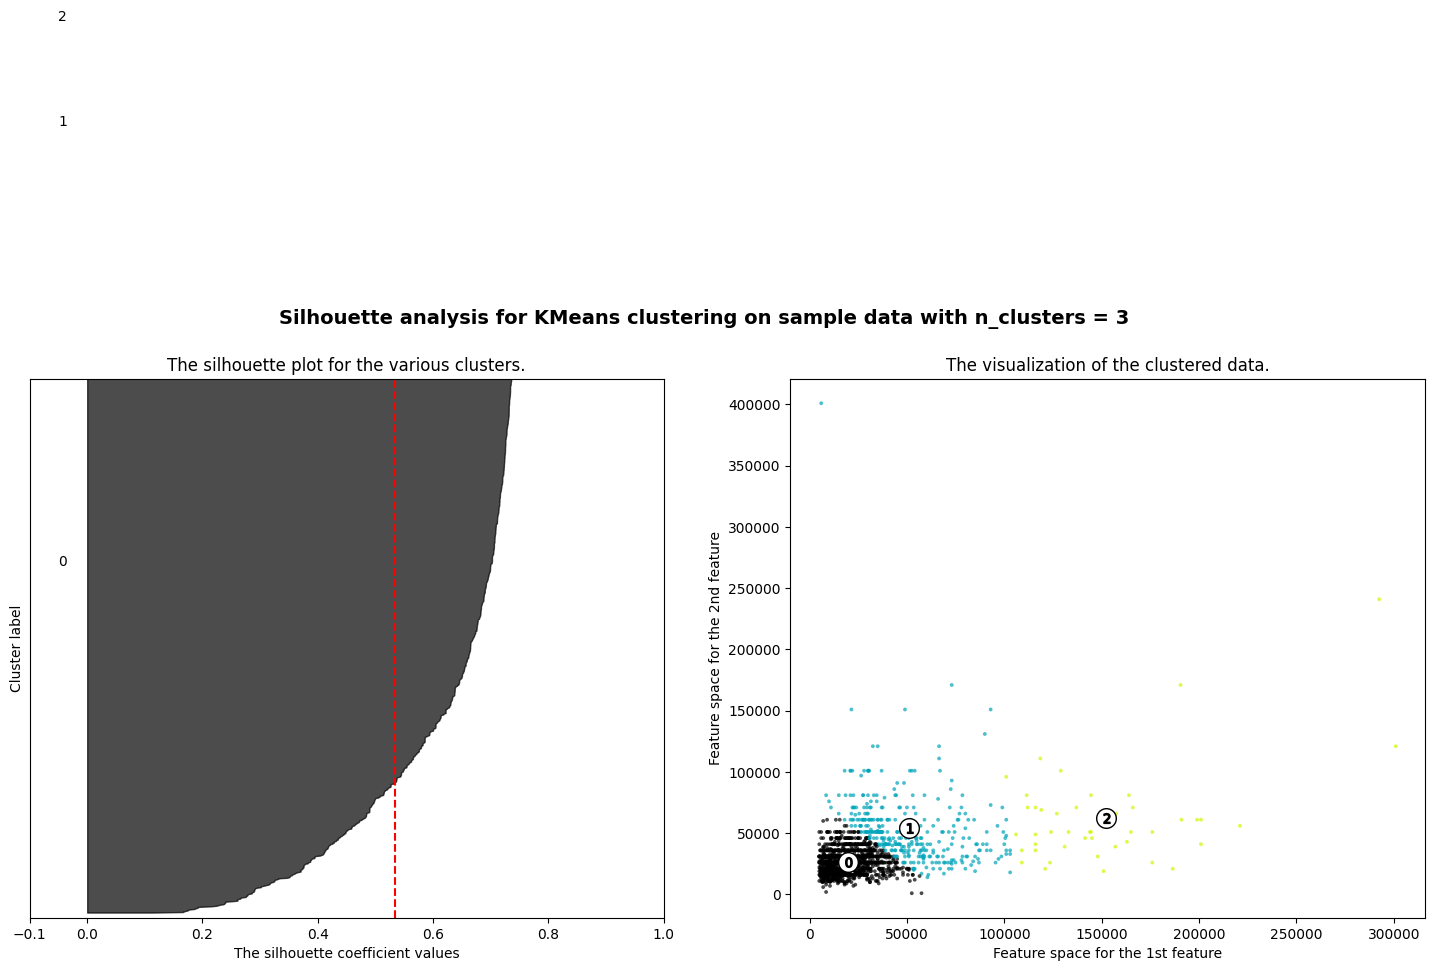

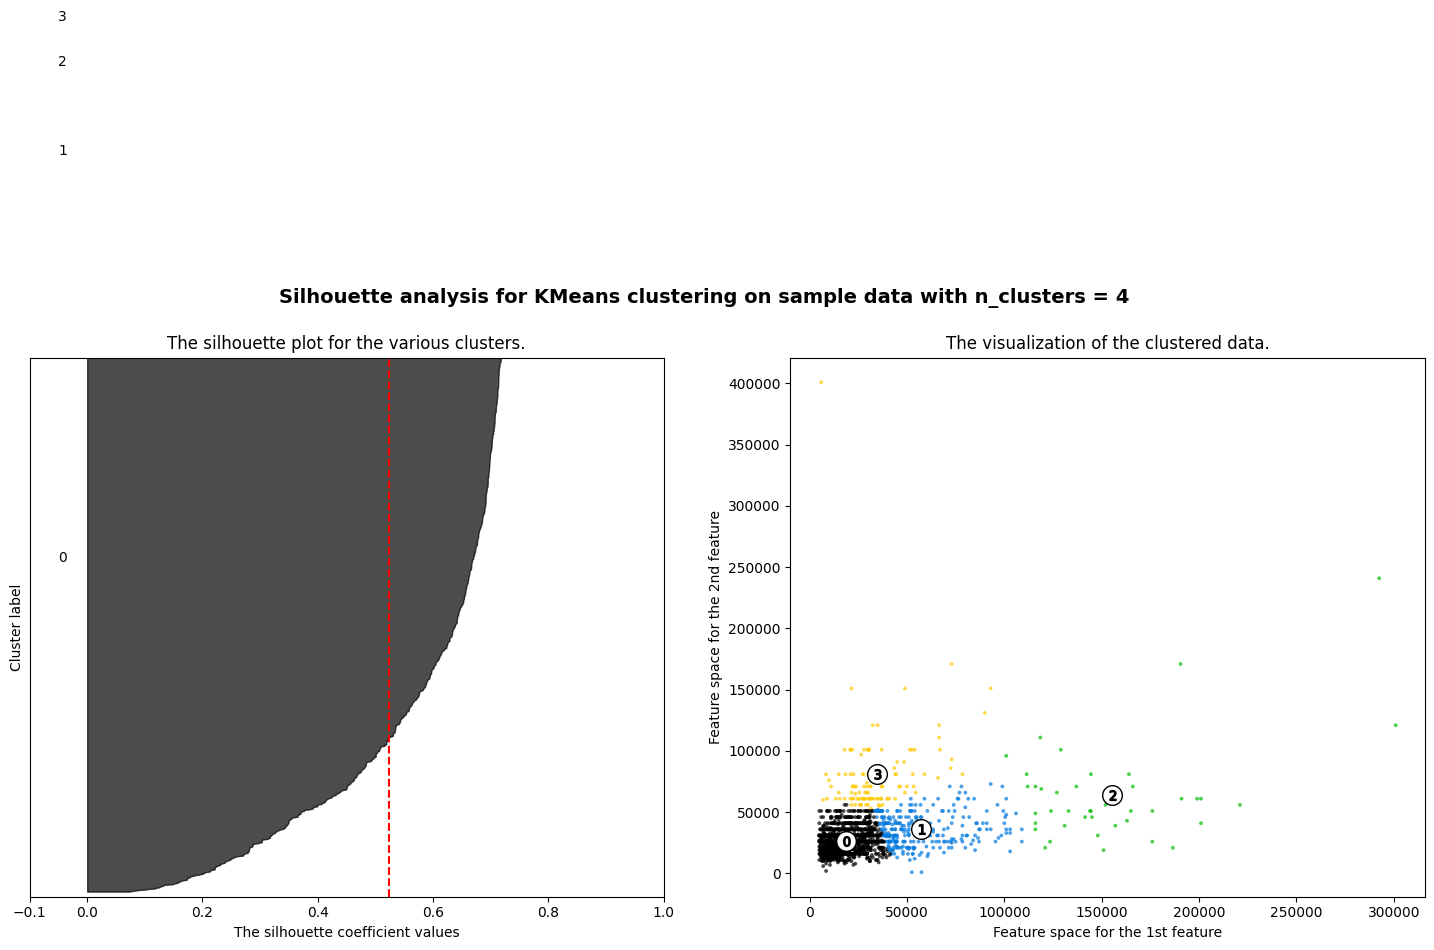

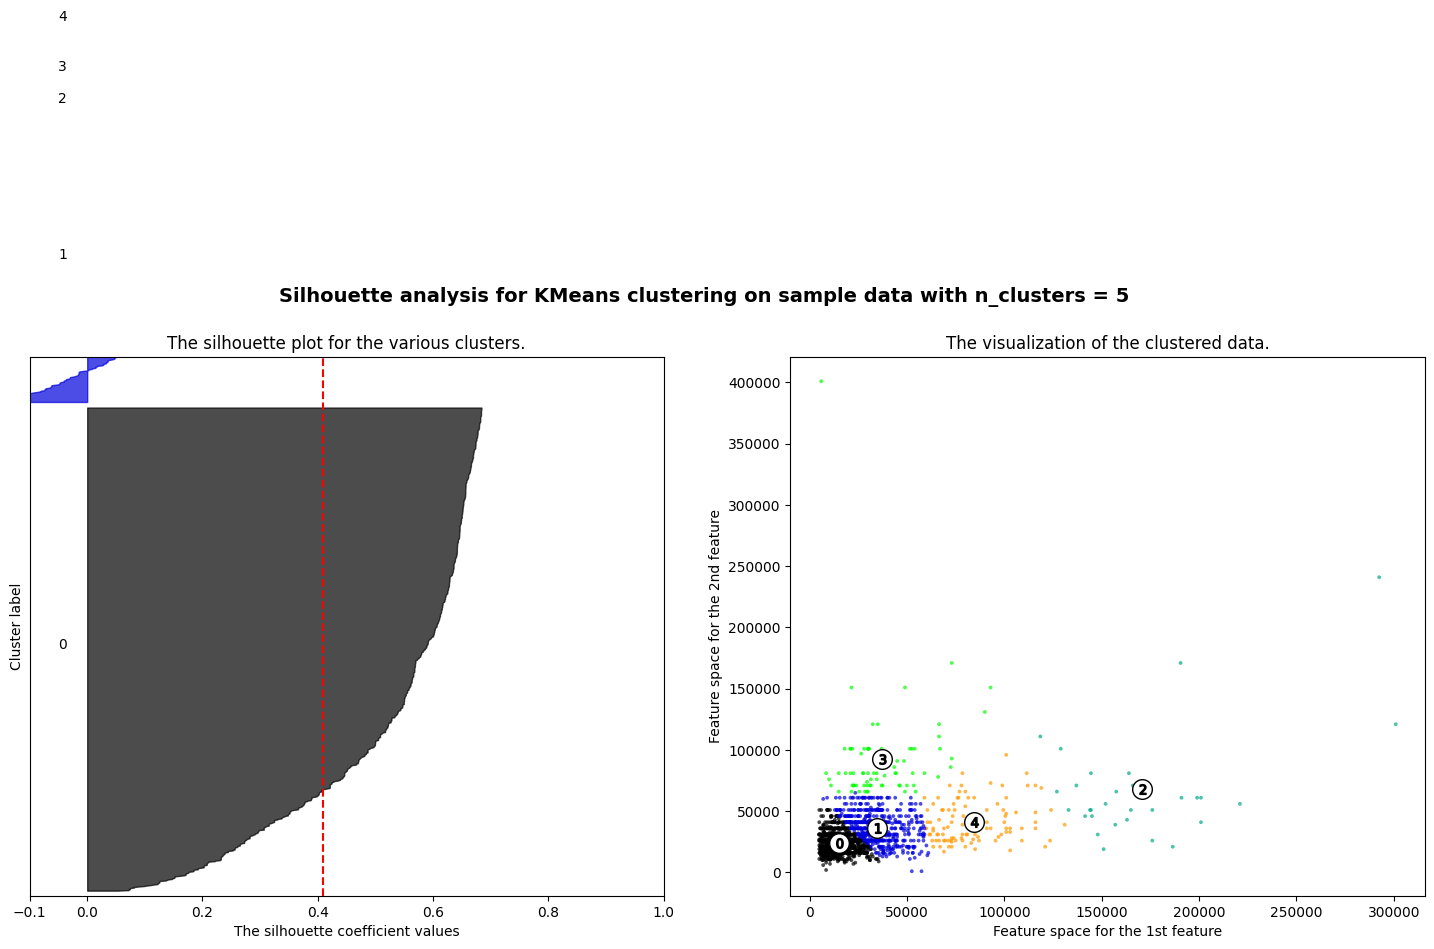

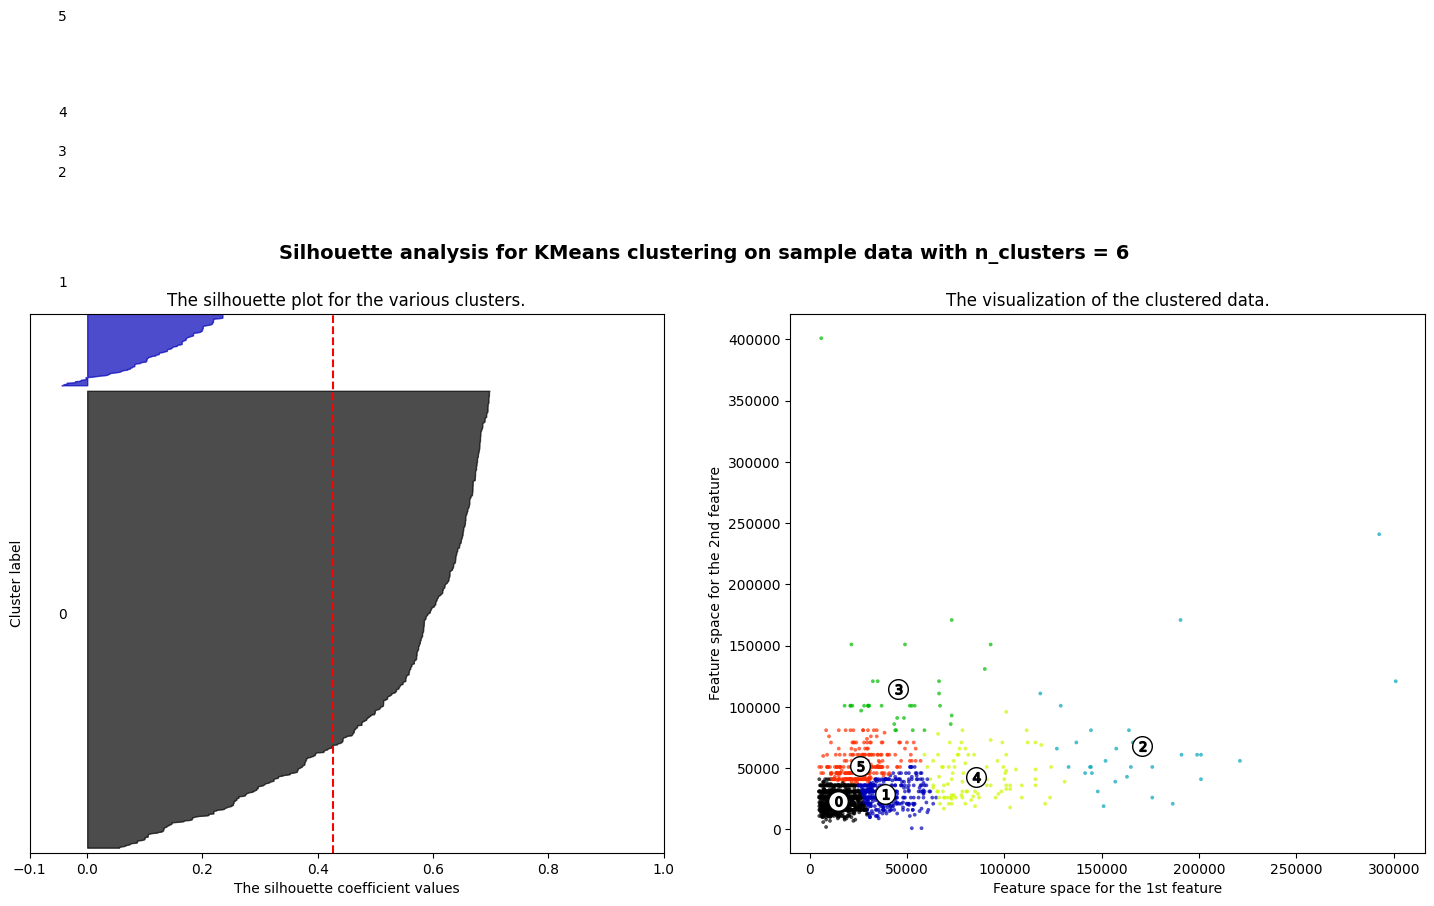

In [63]:

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=1000,
    n_features=14,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(x1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x1[:, 0], x1[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhouette score for K-Means clustering at K = 4 is 0.523 whilst K = 2 number of clusters provided as the suitable number of clusters with the best Silhouette score at 0.700 

Reference : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

DBSCAN Clustering

The Density-Based Spatial Clustering of Applications with Noise Algorithm is a density-based clustering technique. It groups data points based on their density and proximity to each other. It forms clusters by identifying core points (with sufficient nearby points) and expanding them to reach neighboring points. Points not part of any cluster are classified as noise or outliers.
It groups 'densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. Data density representing the minimal distance distribution in the datapoint.
DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

Using the DB Scan Clustering approach we would also find the appropriate number of clusters for income and credit amount of customers using the DB scan clustering approach

Advantage of DBSAN Clustering

1. The DBSCAN clustering is robust to outliers.
2. DBSCAN clustering does not require the optimum number of cluster like K_Means beforehand.

In [9]:
dbscan=DBSCAN(eps=3,min_samples=4)

# Fitting the model
X = data.iloc[:, [3, 4]].values
model=dbscan.fit(X)

labels=model.labels_


from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(X,labels))

ValueError: could not convert string to float: 'male'

K-Means CLustering for CUstomer Incomes and their Region

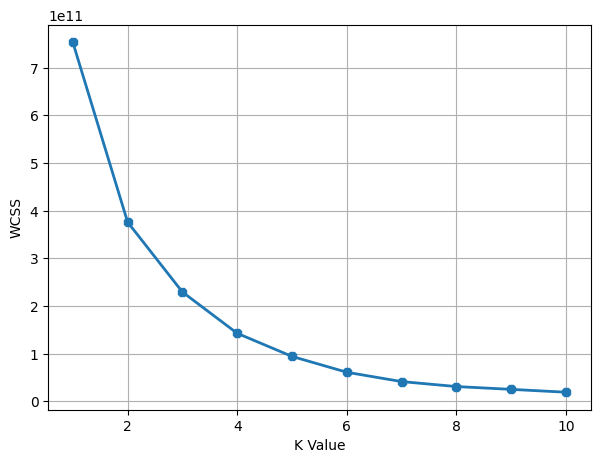

In [40]:
x2 = data.loc[:, ["income", "region"]].values
 
wcss = []
 
for k in range(1, 11):
    age_kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    age_kmeans.fit(x2)
    wcss.append(age_kmeans.inertia_)
plt.figure(figsize=(7, 5))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [41]:
age_kmeans =KMeans(n_clusters=4)
label = age_kmeans.fit_predict(x2)
print(label)

[0 0 0 ... 0 1 1]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
print(age_kmeans.cluster_centers_)

[[2.42544887e+04 1.82201405e+00]
 [4.93298429e+04 1.29319372e+00]
 [3.21000000e+05 1.00000000e+00]
 [9.83448276e+04 1.15517241e+00]]


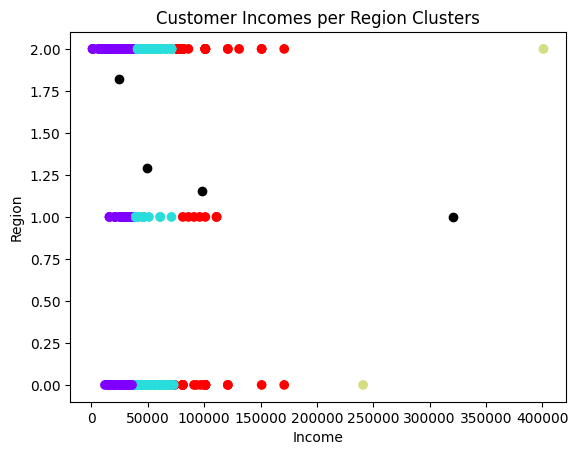

In [50]:
plt.scatter(x2[:,0], x2[:,1], c=age_kmeans.labels_, cmap= 'rainbow')
plt.scatter(age_kmeans.cluster_centers_[:,0],age_kmeans.cluster_centers_[:,1], color ='black')
plt.title('Customer Incomes per Region Clusters')
plt.ylabel('Region')
plt.xlabel('Income')
plt.show()